In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [0]:
df = pd.read_csv('iris-hard.csv')
df

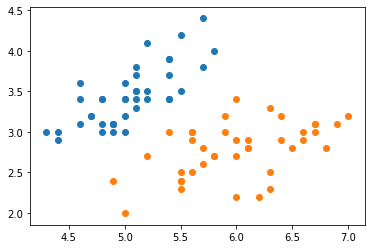

In [360]:
# visualize the data
c1 = df[df['species'] == 'Iris-setosa']
c2 = df[df['species'] == 'Iris-versicolor']

plt.scatter(c1.iloc[:,0], c1.iloc[:,1])
plt.scatter(c2.iloc[:,0], c2.iloc[:,1])

In [0]:
# prepare the data
X = df.iloc[:, :-1].to_numpy()
Y = df['species']
Y = (Y == 'Iris-versicolor')
Y = 2 * (Y) - 1
Y = Y.to_numpy()

In [0]:
n_features = 2

def train_svm_using_sgd(x,y):
    #initilizing weights
    w = np.zeros(n_features)
    b = 0.
    h = 0.3 # TODO: choose

    learning_rate = 1.
    n_epochs = 1000

    #training svm
    for epoch in range(1, n_epochs + 1):
      for i in range(len(x)): # for each data point
        prediction = np.dot(x[i], w) + b
        if y[i]*prediction < 1.: # incorrect classification
            w = w - learning_rate * (-y[i]*x[i] +  (1./epoch) * h * w)
            b = b - learning_rate * -y[i]
        else: # correct classification
            w = w - learning_rate * (1./epoch) * h * w
            b = b - learning_rate * 0 # b is not involved in the update
            
      learning_rate = learning_rate * 0.995
      
    return w, b

In [0]:
w, b = train_svm_using_sgd(X, Y)

In [0]:
def plot_margin(w, b):

  def plot_line(slope,intercept,style):
    x1 = 4
    x2 = 7
    y = [ (slope*x + intercept) for x in [x1,x2]]
    plt.plot([x1,x2], y, style)

  plot_line(-w[0]/w[1], -b/w[1], 'g-')
  plot_line(-w[0]/w[1], (1-b)/w[1], 'g--')
  plot_line(-w[0]/w[1], (-1-b)/w[1], 'g--')

plot_margin(w,b)
plt.scatter(c1.iloc[:,0], c1.iloc[:,1])
plt.scatter(c2.iloc[:,0], c2.iloc[:,1])